In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
df = pd.read_csv('Data/movies_tableau_V3.csv')

Quick check of the relationship between some of the numeric variables in DF:

In [25]:
df.corr(numeric_only=True)

,budget,domestic_revenue,world_revenue,year,isAdult,startYear,averageRating,numVotes
budget,1.000000,0.683269,0.735739,0.216806,-0.009681,0.190948,0.026970,0.379888
domestic_revenue,0.683269,1.000000,0.942330,0.071537,-0.000062,0.059328,0.169823,0.528997
world_revenue,0.735739,0.942330,1.000000,0.129769,-0.003701,0.115483,0.166862,0.511019
year,0.216806,0.071537,0.129769,1.000000,-0.032476,0.886654,-0.114854,0.002709
isAdult,-0.009681,-0.000062,-0.003701,-0.032476,1.000000,-0.034139,-0.019318,-0.006374
startYear,0.190948,0.059328,0.115483,0.886654,-0.034139,1.000000,-0.049130,-0.042764
averageRating,0.026970,0.169823,0.166862,-0.114854,-0.019318,-0.049130,1.000000,0.354898
numVotes,0.379888,0.528997,0.511019,0.002709,-0.006374,-0.042764,0.354898,1.000000


There are some redundant columns in this data set. Dropping those before proceeding:

In [26]:
df = df.drop(columns='startYear')

Run time should be numeric. Changing data type:

In [28]:
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')
#show new correlation matrix
df.corr(numeric_only=True)

In [30]:
model_df = df.select_dtypes(include=['number'])

model.csv save to data folder:

In [32]:
model_df.to_csv('model.csv',index=True)

<Axes: xlabel='runtimeMinutes', ylabel='Count'>

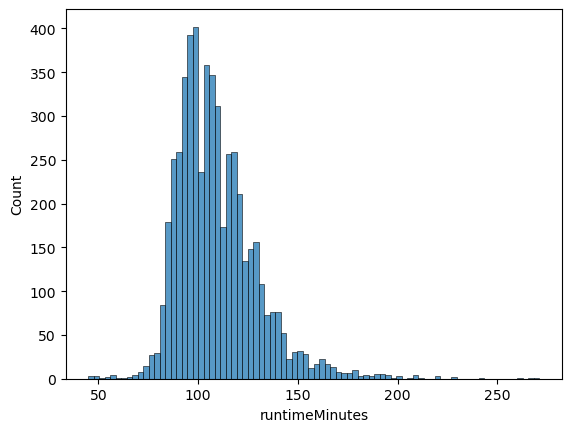

In [36]:
X = df['runtimeMinutes']
sns.histplot(X)

4


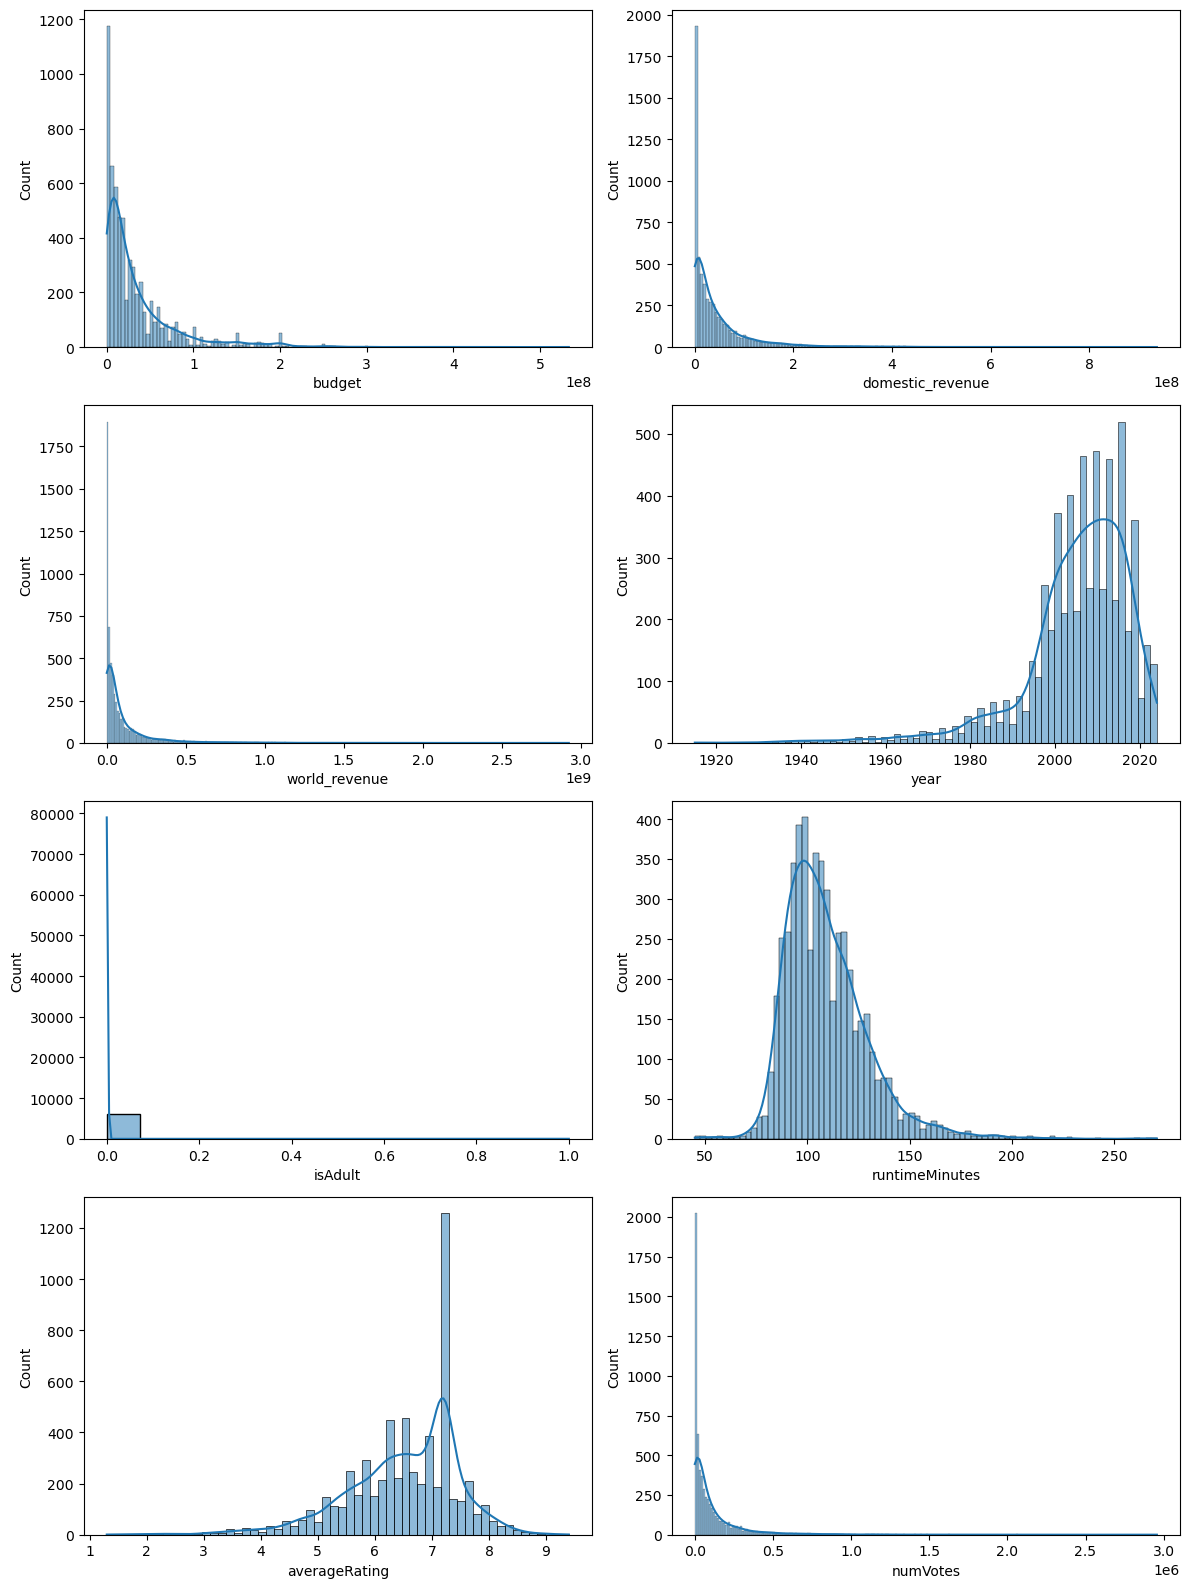

In [42]:
# Set up the grid
num_columns = len((model_df).columns)
cols = 2  # Number of columns in the grid
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate rows needed
print(rows)

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten to easily index

# build histograms
for i, column in enumerate((model_df).columns):
    sns.histplot(model_df[column], kde=True, ax=axes[i])

#show the resulting hist
plt.tight_layout()
plt.show()

isAdult seems to be a binary column and may be useful for categorical modeling. However that is not the aim of this project so I will drop that column:

In [43]:
model_df = model_df.drop(columns='isAdult')

Now that we have seen the distribution of the values in this dataframe, lets try an initial model: